# Optimal Profit Increase

## Introduction

In this section, we apply the mathematical model provided in the assignment to quantify the impact of improved model accuracy.

We determine the optimal profit margin that maximizes the yearly profit for both models, and the difference between 2 optimal profit values represents the maximum amount that betting company should be willing to pay for additional data.

To find the solution, we first defined the given parameters and implemented necessary functions for margin decomposition, demand and profit calculation. These functions were then applied to dataset consisting of individual country accuracies to calculate and visualize the profit differences between baseline (A0) and improved (A1) models.

Next, we performed the numerical verification using grid search to confirm that the results from analytical solution are correct.

## Analytical background

We maximize yearly profit

$$
\Pi(m_{\text{profit}}, A)
= \alpha\, b\, (m_{\text{profit}} + m_{\text{operations}} + k(1-A))^{-\varepsilon}\, m_{\text{profit}}.
$$

The **first-order condition**

$$
\frac{\partial \Pi}{\partial m_{\text{profit}}} = 0
$$

yields

$$
m_{\text{profit}}^{*}(A)
= \frac{m_{\text{operations}} + k(1-A)}{\varepsilon - 1}.
$$

The **second-order condition** confirms a maximum since

$$
\varepsilon > 1.
$$

We also note feasibility

$$
m_{\text{profit}}^{*} \ge 0.
$$

As accuracy \(A\) increases, the risk margin $$(k(1-A))$$ decreases,  
therefore the optimal margin $$(m^{*})$$ decreases, demand rises, and total profit increases.

## Defining mathematical model parameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

In [2]:
# Operational cost margin m_operations
m_operations = 0.03

# Risk margin parameter k
k = 0.3

# Demand function parameters alpha and epsilon
alpha = 1000
epsilon = 3  # price elasticity of demand

# Average bet amount b (USD)
b = 12


## Defining functions from the assignment

In [3]:
def risk_margin(A):

    return k * (1 - A)


def total_margin(m_profit, A):

    return m_profit + m_operations + risk_margin(A)


def demand(m):

    return alpha * (m ** (-epsilon))


def profit(m_profit, A):

    m = total_margin(m_profit, A)
    V = demand(m)
    return V * m_profit * b

def optimal_m_profit(A):

    return (risk_margin(A) + m_operations) / (epsilon - 1)


## Analytical solution per country

### Creating dataframe with accuracy values

In [4]:
import pandas as pd

# Test accuracies of the baseline model
A0_df = pd.DataFrame({
    "Country": [
        "Portugal","Germany","France","Belgium","Greece",
        "England","Netherland","Turkey","Italy","Scotland","Spain", "All"
    ],
    "A0": [
        0.584795,
        0.570988,
        0.560241,
        0.550000,
        0.545455,
        0.544883,
        0.532468,
        0.531915,
        0.525799,
        0.512500,
        0.511574,
        0.5447
    ]
})

# Test accuracies of the improved model
A1_df = pd.DataFrame({
    "Country": [
        "Portugal","Belgium","Germany","France","Spain",
        "Netherland","Turkey","Italy","England","Scotland","Greece", "All"
    ],
    "A1": [
        0.631970,
        0.613636,
        0.611913,
        0.587273,
        0.583884,
        0.578755,
        0.577922,
        0.571843,
        0.557661,
        0.539493,
        0.483412,
        0.573
    ]
})

# Merge into one table on Country
df = pd.merge(A0_df, A1_df, on="Country", how="inner")

print(df)


       Country        A0        A1
0     Portugal  0.584795  0.631970
1      Germany  0.570988  0.611913
2       France  0.560241  0.587273
3      Belgium  0.550000  0.613636
4       Greece  0.545455  0.483412
5      England  0.544883  0.557661
6   Netherland  0.532468  0.578755
7       Turkey  0.531915  0.577922
8        Italy  0.525799  0.571843
9     Scotland  0.512500  0.539493
10       Spain  0.511574  0.583884
11         All  0.544700  0.573000


### Computation

In [5]:
df["m_risk_A0"] = df["A0"].apply(risk_margin)
df["m_risk_A1"] = df["A1"].apply(risk_margin)

df["m_profit_opt_A0"] = df["A0"].apply(optimal_m_profit)
df["m_profit_opt_A1"] = df["A1"].apply(optimal_m_profit)

df["profit_A0"] = df.apply(lambda x: profit(x["m_profit_opt_A0"], x["A0"]), axis=1)
df["profit_A1"] = df.apply(lambda x: profit(x["m_profit_opt_A1"], x["A1"]), axis=1)

df["delta_profit"] = df["profit_A1"] - df["profit_A0"]
df["delta_profit_%"] = (df["delta_profit"] / df["profit_A0"]) * 100

df_rounded = df.round({
    "A0": 3, "A1": 3, "m_risk_A0": 3, "m_risk_A1": 3,
    "m_profit_opt_A0": 3, "m_profit_opt_A1": 3,
    "profit_A0": 2, "profit_A1": 2, "delta_profit": 2, "delta_profit_%": 2
})

In [6]:
df_rounded

,Country,A0,A1,m_risk_A0,m_risk_A1,m_profit_opt_A0,m_profit_opt_A1,profit_A0,profit_A1,delta_profit,delta_profit_%
0,Portugal,0.585,0.632,0.125,0.110,0.077,0.070,74417.46,90175.30,15757.84,21.17
1,Germany,0.571,0.612,0.129,0.116,0.079,0.073,70583.62,82916.41,12332.79,17.47
2,France,0.560,0.587,0.132,0.124,0.081,0.077,67800.86,75138.51,7337.66,10.82
3,Belgium,0.550,0.614,0.135,0.116,0.082,0.073,65299.46,83504.93,18205.47,27.88
4,Greece,0.545,0.483,0.136,0.155,0.083,0.092,64233.47,51957.09,-12276.38,-19.11
5,England,0.545,0.558,0.137,0.133,0.083,0.081,64101.16,67157.31,3056.15,4.77
6,Netherland,0.532,0.579,0.140,0.126,0.085,0.078,61327.36,72702.80,11375.45,18.55
7,Turkey,0.532,0.578,0.140,0.127,0.085,0.078,61208.02,72470.99,11262.97,18.40
8,Italy,0.526,0.572,0.142,0.128,0.086,0.079,59911.07,70812.33,10901.26,18.20
9,Scotland,0.512,0.539,0.146,0.138,0.088,0.084,57229.40,62874.26,5644.86,9.86


### Interpretation of the per-country optimal profit table

Each row shows how improving the model accuracy from A0 → A1 affects:

- **m_risk**: the risk component of the margin  
- **m_profit_opt**: the optimal profit margin the bookmaker should charge  
- **profit**: the resulting yearly optimal profit for that country


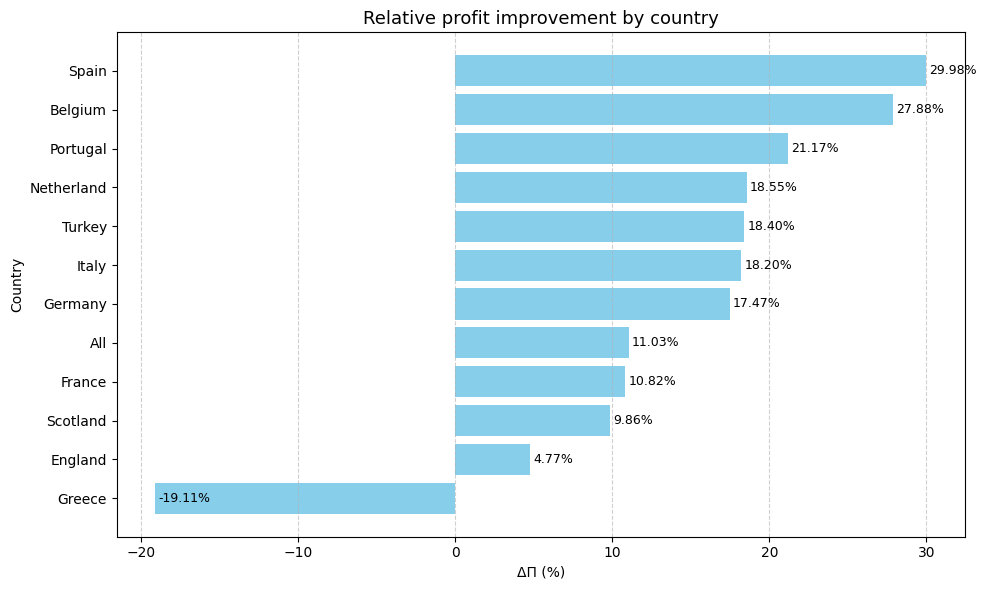

In [7]:
df_sorted = df.sort_values(by="delta_profit_%", ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.barh(df_sorted["Country"], df_sorted["delta_profit_%"], color="skyblue")
plt.gca().invert_yaxis()
plt.title("Relative profit improvement by country", fontsize=13)
plt.xlabel("ΔΠ (%)")
plt.ylabel("Country")
plt.grid(axis="x", linestyle="--", alpha=0.6)


for bar, value in zip(bars, df_sorted["delta_profit_%"]):
    plt.text(
        value + 0.2,
        bar.get_y() + bar.get_height()/2,
        f"{value:,.2f}%".replace(",", " "),
        va="center", ha="left", fontsize=9, color="black"
    )

plt.tight_layout()
plt.show()


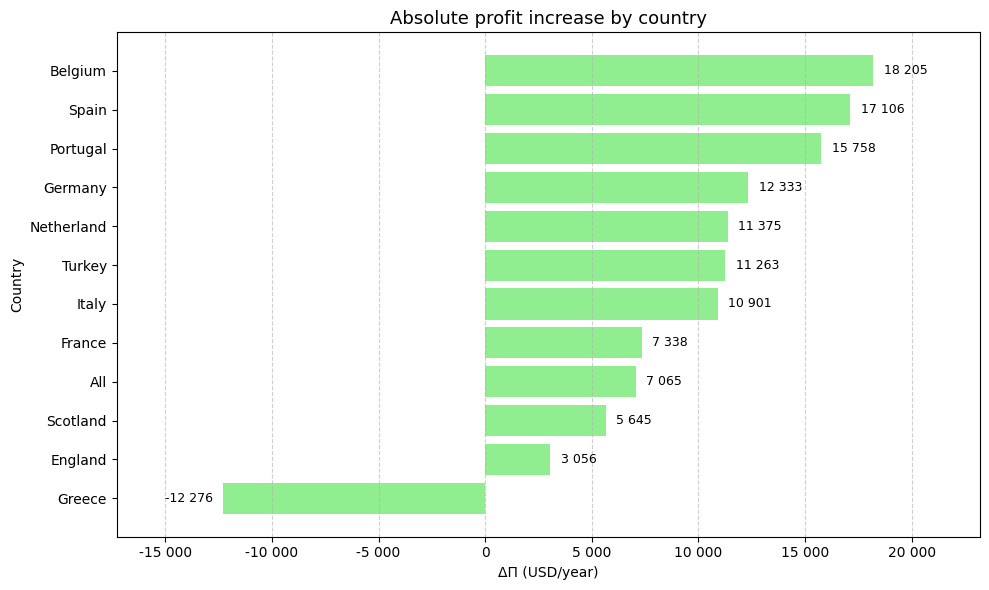

In [8]:
df_sorted = df.sort_values(by="delta_profit", ascending=False)

def space_thousands(x, pos):
    return f"{int(x):,}".replace(",", " ")

plt.figure(figsize=(10, 6))
bars = plt.barh(df_sorted["Country"], df_sorted["delta_profit"], color="lightgreen")
plt.gca().invert_yaxis()
plt.title("Absolute profit increase by country", fontsize=13)
plt.xlabel("ΔΠ (USD/year)")
plt.ylabel("Country")
plt.grid(axis="x", linestyle="--", alpha=0.6)

# X axis format
plt.gca().xaxis.set_major_formatter(FuncFormatter(space_thousands))


xmin = df_sorted["delta_profit"].min() - 5000
xmax = df_sorted["delta_profit"].max() + 5000
plt.xlim(xmin, xmax)

# Descriptions
for bar, value in zip(bars, df_sorted["delta_profit"]):

    offset = 500
    if value >= 0:
        plt.text(value + offset, bar.get_y() + bar.get_height()/2,
                 f"{value:,.0f}".replace(",", " "),
                 va="center", ha="left", fontsize=9, color="black")
    else:
        plt.text(value - offset, bar.get_y() + bar.get_height()/2,
                 f"{value:,.0f}".replace(",", " "),
                 va="center", ha="right", fontsize=9, color="black")

plt.tight_layout()
plt.show()


### Country results interpretation

Most countries show clear accuracy improvements with the new model. Portugal, Belgium, Germany, France, Spain, and the Netherlands gain the most. England, France, and Scotland improve only slightly, suggesting limited additional benefit from the upgrade.

Greece is the only country with a decline, confirming that the improved model does not fit well.

Overall, the new model provides consistent value across nearly all markets, with Greece as the lone exception.

## Numerical verification

In [9]:
tol = 1e-4 # tolerance

# Grid Search function
def numerical_opt_over_grid(A, m_profit_star, span=0.03, n=2001):
    lo = max(1e-4, m_profit_star - span)
    hi = m_profit_star + span
    grid = np.linspace(lo, hi, n)
    profits = [profit(m, A) for m in grid]
    i_max = int(np.argmax(profits))
    return grid[i_max]


# Numerical optimum for A1
df["m_profit_num_A1"] = df.apply(
    lambda r: numerical_opt_over_grid(r["A1"], r["m_profit_opt_A1"]),
    axis=1
)

# Numerical optimum for A0
df["m_profit_num_A0"] = df.apply(
    lambda r: numerical_opt_over_grid(r["A0"], r["m_profit_opt_A0"]),
    axis=1
)

# comparison table
verif = pd.DataFrame({
    "Country": df["Country"],
    "A0": df["A0"],
    "A1": df["A1"],
    "m_profit_analytical_A0": df["m_profit_opt_A0"],
    "m_profit_numerical_A0": df["m_profit_num_A0"],
    "diff_A0": (df["m_profit_num_A0"] - df["m_profit_opt_A0"]).abs(),
    "m_profit_analytical_A1": df["m_profit_opt_A1"],
    "m_profit_numerical_A1": df["m_profit_num_A1"],
    "diff_A1": (df["m_profit_num_A1"] - df["m_profit_opt_A1"]).abs()
})

# Rounding numbers
verif_out = verif.round({
    "A0": 3, "A1": 3,
    "m_profit_analytical_A0": 6, "m_profit_numerical_A0": 6, "diff_A0": 6,
    "m_profit_analytical_A1": 6, "m_profit_numerical_A1": 6, "diff_A1": 6
}).sort_values("diff_A1", ascending=False)

# Summary
total = len(verif_out)
maxdiff_A0 = verif_out["diff_A0"].max()
maxdiff_A1 = verif_out["diff_A1"].max()
print(f"Analytical vs Numerical Optimum Verification")
print(f"-------------------------------------------")
print(f"Number of countries: {total}")
print(f"Max |diff| for A0 = {maxdiff_A0:.6f}")
print(f"Max |diff| for A1 = {maxdiff_A1:.6f}")

verif_out.head(21)



Analytical vs Numerical Optimum Verification
-------------------------------------------
Number of countries: 12
Max |diff| for A0 = 0.000000
Max |diff| for A1 = 0.000000


,Country,A0,A1,m_profit_analytical_A0,m_profit_numerical_A0,diff_A0,m_profit_analytical_A1,m_profit_numerical_A1,diff_A1
0,Portugal,0.585,0.632,0.077281,0.077281,0.0,0.070204,0.070204,0.0
1,Germany,0.571,0.612,0.079352,0.079352,0.0,0.073213,0.073213,0.0
2,France,0.560,0.587,0.080964,0.080964,0.0,0.076909,0.076909,0.0
3,Belgium,0.550,0.614,0.082500,0.082500,0.0,0.072955,0.072955,0.0
4,Greece,0.545,0.483,0.083182,0.083182,0.0,0.092488,0.092488,0.0
5,England,0.545,0.558,0.083268,0.083268,0.0,0.081351,0.081351,0.0
6,Netherland,0.532,0.579,0.085130,0.085130,0.0,0.078187,0.078187,0.0
7,Turkey,0.532,0.578,0.085213,0.085213,0.0,0.078312,0.078312,0.0
8,Italy,0.526,0.572,0.086130,0.086130,0.0,0.079224,0.079224,0.0
9,Scotland,0.512,0.539,0.088125,0.088125,0.0,0.084076,0.084076,0.0


A grid search was used to numerically verify the analytical optimum, as the optimization problem involves only 1 variable and the profit function is smooth, unimodal with 1 global maximum.
The verification confirmed that the analytical optimum is correct within the defined 1e-4 tolerance.

## Summary

- Improved model accuracy (A1) leads to higher yearly profits in most countries.
- Analytical optimal profit margins were validated by grid search, showing perfect match.
- Largest profits at the country level were achieved in Portugal, Spain and  Belgium.
- Greece is the only market with negative impact for country based decision, indicating that additional data would not be justified for this model.

## Limitations and Assumptions

- The demand function is stylized:
  
  $$
  V(m) = \alpha\, m^{-\varepsilon}
  $$

  but real elasticity can vary between countries and sports markets.

- Model accuracy is treated as the **only** source of pricing risk.  
  Calibration quality, probability distribution errors, and confidence levels are not included.

- Bets are assumed independent, and the average bet size is treated as a constant:

  $$
  b = 12
  $$

  In practice, bet size varies by market and customer segment.

- The model abstracts away from operational realities such as:
  - customer heterogeneity  
  - competitive pressure from other bookmakers  
  - regulatory margin caps  

- The profit metric represents **expected value**:

  $$
  \Pi^{*}(A)
  $$

  and does not incorporate variance, risk measures, or bankroll volatility.

---

Despite these simplifications, the model provides a clear and economically interpretable estimate of how improved predictive accuracy increases optimal profit and thus quantifies the value of enhanced data.
